# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

In [2]:
df = pd.read_csv("../data/raw/datos_completos.csv")
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
n_unicos = df.nunique()
n_unicos

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [6]:
df.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


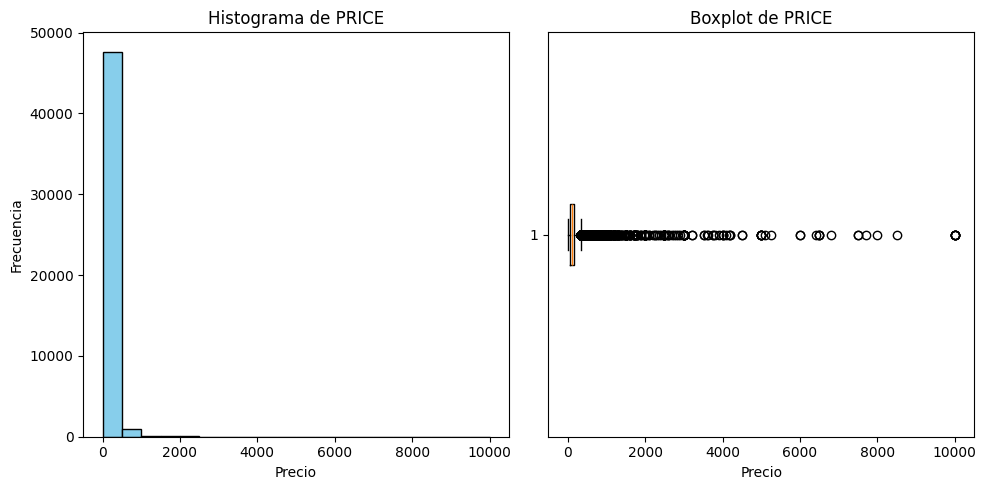

In [9]:


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [10]:
# Comprobamos el porcentaje de anuncios que presentan al menos un valor faltante
df.isnull().any(axis=1).mean()*100

np.float64(0.0)

In [11]:
# Factorizar los datos no numericos
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

In [12]:
# Separamos las variables independientes de la dependiente
X = df.drop(['price'], axis=1)
y = df['price']

# Ajusta un modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

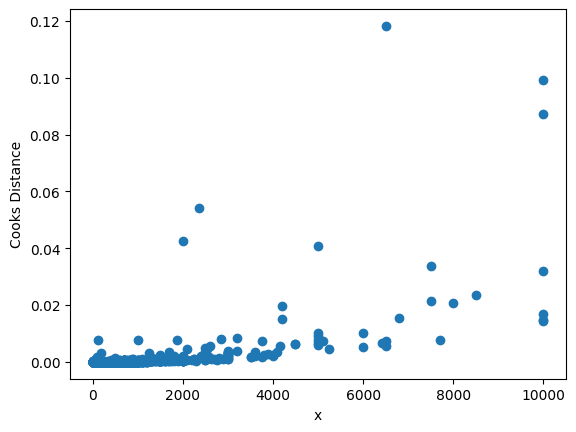

In [13]:
plt.scatter(df.price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [14]:
# Punto de corte para la distancia de cook
pto_corte = 4/len(df)

np.where(cooks_distance[0]>pto_corte)

(array([  116,   299,   496,   653,   662,   691,   754,   762,   780,
          890,   946,   957,  1105,  1139,  1202,  1305,  1315,  1362,
         1414,  1449,  1480,  1553,  1621,  1862,  1899,  1910,  2018,
         2040,  2150,  2155,  2163,  2215,  2236,  2355,  2386,  2520,
         2523,  2618,  2698,  2772,  2854,  2896,  3049,  3055,  3131,
         3233,  3306,  3333,  3345,  3398,  3420,  3537,  3598,  3622,
         3636,  3637,  3684,  3689,  3695,  3700,  3702,  3720,  3721,
         3723,  3727,  3730,  3731,  3732,  3755,  3758,  3761,  3774,
         3782,  3784,  3785,  3788,  3793,  3804,  3812,  3813,  3817,
         3945,  4127,  4345,  4372,  4376,  4377,  4381,  4437,  4719,
         4730,  5351,  5432,  5499,  5767,  5801,  5839,  5861,  5942,
         6107,  6190,  6277,  6333,  6397,  6501,  6511,  6530,  6620,
         6715,  6784,  6898,  6987,  7088,  7096,  7190,  7328,  7355,
         7356,  7370,  7430,  7477,  7485,  7513,  7541,  7769,  7846,
      

In [15]:
df1 = df.drop(np.where(cooks_distance[0]>pto_corte)[0])

In [16]:
# Separamos las variables independientes de la dependiente
X = df1.drop(['price'], axis=1)
y = df1['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df1 = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df1 = df1.sort_values(by='Importance', ascending=False)
df1

,Feature,Importance
5,room_type,61.596333
4,longitude,7.556033
8,calculated_host_listings_count,5.580956
3,latitude,5.041913
6,minimum_nights,4.531439
9,availability_365,4.072558
2,neighbourhood,3.661858
7,number_of_reviews,3.526297
0,host_id,2.607536
1,neighbourhood_group,1.825085


In [19]:
df1[df1.Importance>1]['Feature'].values

array(['room_type', 'longitude', 'calculated_host_listings_count',
       'latitude', 'minimum_nights', 'availability_365', 'neighbourhood',
       'number_of_reviews', 'host_id', 'neighbourhood_group'],
      dtype=object)

In [20]:
# Seleccionamos las características que presentan más de un 1% de importancia
X_train = X_train[df1[df1.Importance>1]['Feature'].values]
X_test = X_test[df1[df1.Importance>1]['Feature'].values]

In [21]:
X_train.corr()

,room_type,longitude,calculated_host_listings_count,latitude,minimum_nights,availability_365,neighbourhood,number_of_reviews,host_id,neighbourhood_group
room_type,1.000000,-0.160088,0.096418,-0.002461,0.081820,0.017185,-0.038907,-0.018914,-0.036824,-0.009093
longitude,-0.160088,1.000000,-0.113981,0.066408,-0.079540,0.096885,0.377374,0.053221,0.142729,0.308405
calculated_host_listings_count,0.096418,-0.113981,1.000000,0.023232,0.186512,0.225861,0.004386,-0.072342,0.147019,0.045552
latitude,-0.002461,0.066408,0.023232,1.000000,0.029618,-0.009387,-0.125003,-0.017519,0.026541,0.552189
minimum_nights,0.081820,-0.079540,0.186512,0.029618,1.000000,0.172350,-0.042634,-0.103739,-0.022555,-0.008006
availability_365,0.017185,0.096885,0.225861,-0.009387,0.172350,1.000000,0.123184,0.181592,0.202593,0.121175
neighbourhood,-0.038907,0.377374,0.004386,-0.125003,-0.042634,0.123184,1.000000,0.006784,0.165279,0.477554
number_of_reviews,-0.018914,0.053221,-0.072342,-0.017519,-0.103739,0.181592,0.006784,1.000000,-0.139734,0.009211
host_id,-0.036824,0.142729,0.147019,0.026541,-0.022555,0.202593,0.165279,-0.139734,1.000000,0.164411
neighbourhood_group,-0.009093,0.308405,0.045552,0.552189,-0.008006,0.121175,0.477554,0.009211,0.164411,1.000000


In [22]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

room_type                          1.171726
longitude                          2.427872
calculated_host_listings_count     1.601951
latitude                          10.185212
minimum_nights                     1.418690
availability_365                   2.047438
neighbourhood                      9.595936
number_of_reviews                  1.477348
host_id                            1.676831
neighbourhood_group               18.946589
dtype: float64

<Axes: >

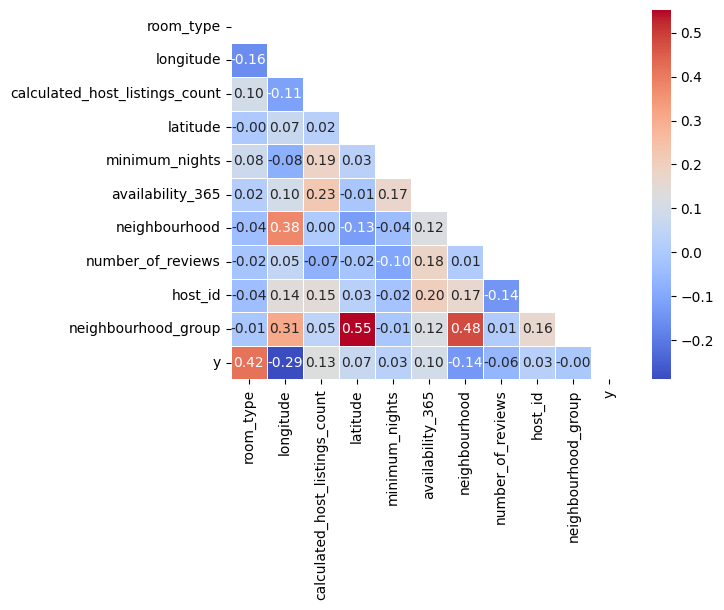

In [23]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [24]:
X_train.drop(['latitude','neighbourhood_group'], axis=1, inplace=True)
X_test.drop(['latitude','neighbourhood_group'], axis=1, inplace=True)

In [25]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

room_type                         1.162653
longitude                         2.170251
calculated_host_listings_count    1.588947
minimum_nights                    1.412229
availability_365                  1.997054
neighbourhood                     1.935461
number_of_reviews                 1.473186
host_id                           1.619999
dtype: float64